Copyright **`(c)`** 2022 Giovanni Squillero `<squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  


In [1]:
import random
from collections import deque, defaultdict

from matplotlib import pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

# Tree Search

## Breadth-first

In [2]:
def tree_search_bf(blocks, goal):
    search_tree = nx.DiGraph()
    frontier = deque()

    frontier.append(((), tuple(blocks)))

    n = 0
    while frontier:
        n += 1
        current_bag, available_blocks = frontier.popleft()
        search_tree.add_node(current_bag)
        search_tree.nodes[current_bag]["color"] = "yellow"
        search_tree.nodes[current_bag]["order"] = n
        search_tree.nodes[current_bag]["count"] = 1

        if sum(current_bag) == goal:
            print(f"Found a solution in {n:,} steps\n\t{current_bag}")
            search_tree.nodes[current_bag]["color"] = "lime"
            break
        # if sum(current_bag) > goal:
        #    search_tree.nodes[current_bag]['color'] = 'red'
        #    continue
        search_tree.nodes[current_bag]["color"] = "royalblue"
        for i, object in enumerate(available_blocks):
            new_state = (
                tuple(sorted((*current_bag, object))),
                tuple(available_blocks[:i] + available_blocks[i + 1 :]),
            )
            if new_state[0] not in search_tree:
                search_tree.add_node(new_state[0], color="lavender", count=0)
                search_tree.add_edge(current_bag, new_state[0], label=object)
            search_tree.nodes[new_state[0]]["count"] += 1
            frontier.append(new_state)

    search_tree.nodes[()]["color"] = "navy"
    return search_tree

In [3]:
NUM_BLOCKS = 6
NUM_BLOCKS_SOLUTION = NUM_BLOCKS // 2

random.seed(17)
BLOCKS = [random.randint(1, 100) for _ in range(NUM_BLOCKS)]
GOAL = sum(random.sample(BLOCKS, NUM_BLOCKS_SOLUTION))

print(f"{BLOCKS} -> {GOAL}")

[67, 54, 39, 47, 38, 23] -> 100


Found a solution in 93 steps
	(23, 38, 39)


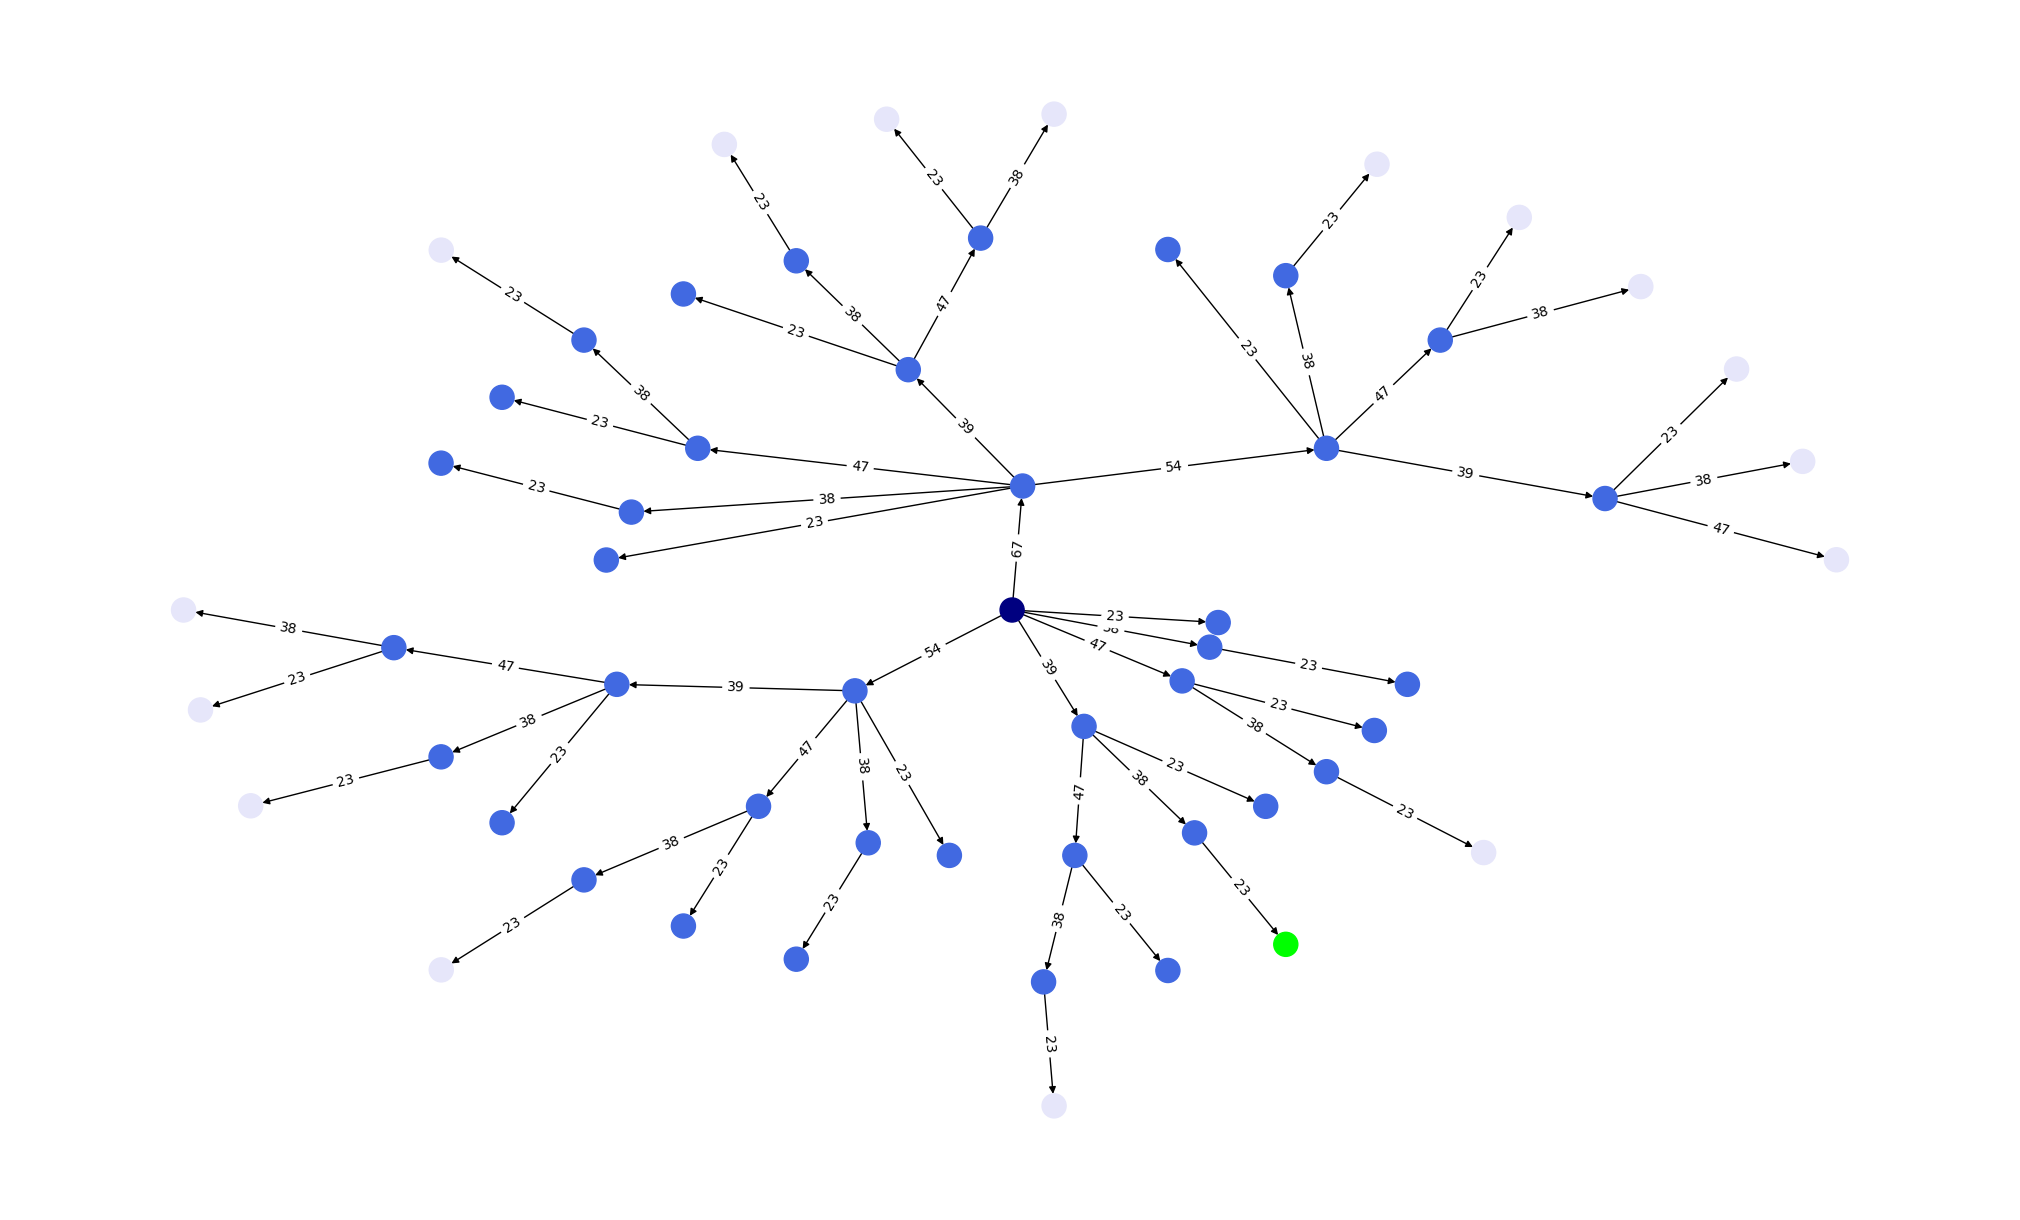

In [4]:
search_tree = tree_search_bf(BLOCKS, GOAL)

plt.figure(figsize=(20, 12))
pos = graphviz_layout(search_tree, prog="twopi")  # dot neato twopi circo fdp sfdp
nx.draw(
    search_tree,
    pos=pos,
    node_color=[c for _, c in search_tree.nodes(data="color")],
    with_labels=False,
)
nx.draw_networkx_edge_labels(search_tree, pos=pos, edge_labels=nx.get_edge_attributes(search_tree, "label"))
None

[(1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (1, 110),
 (6, 160),
 (18, 280),
 (18, 280),
 (16, 260),
 (12, 220),
 (12, 220),
 (12, 220),
 (12, 220),
 (10, 200),
 (9, 190),
 (6, 160),
 (12, 220),
 (10, 200),
 (9, 190),
 (6, 160),
 (3, 130)]

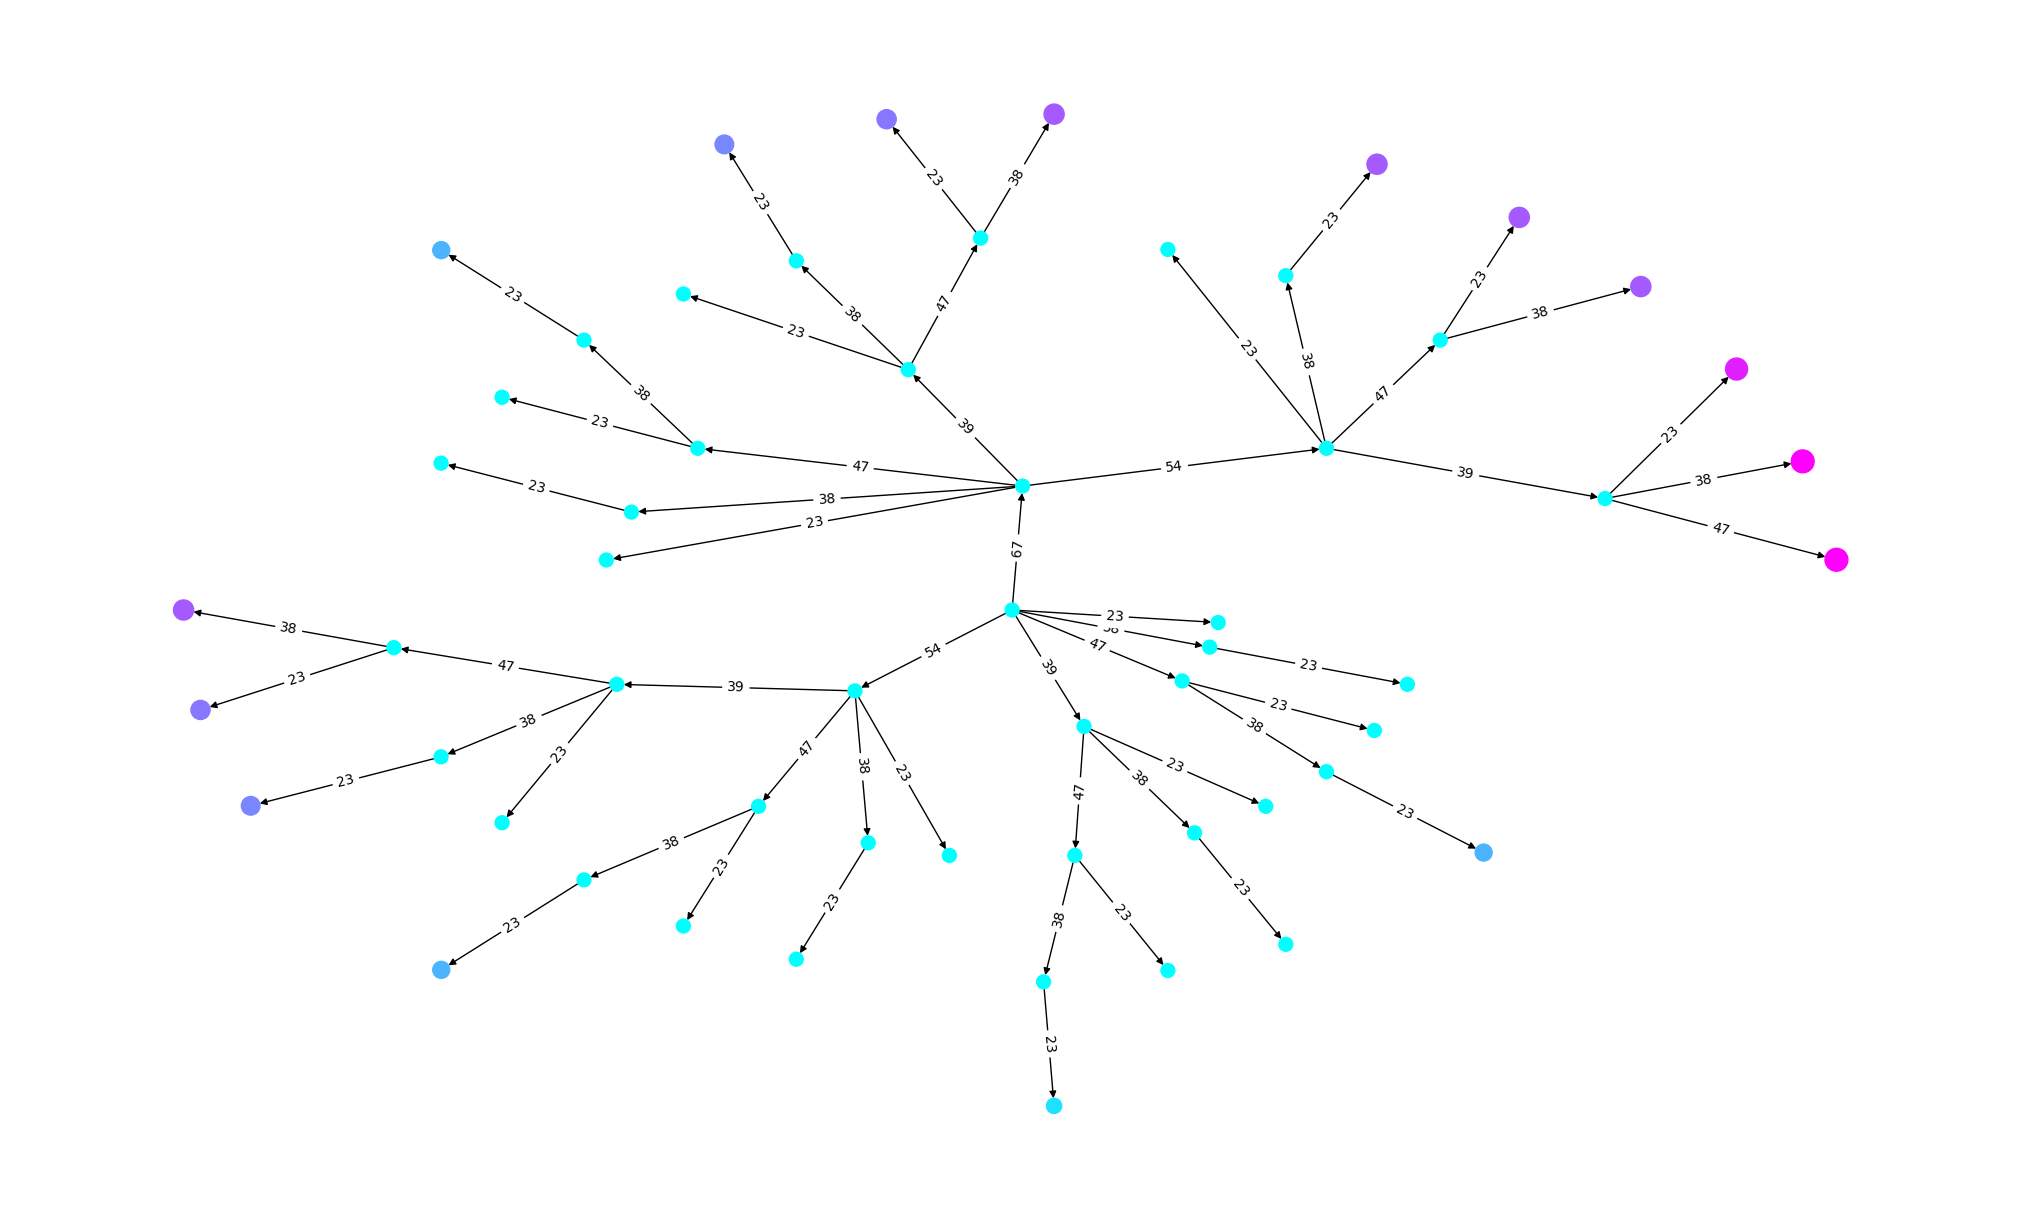

In [13]:
plt.figure(figsize=(20, 12))
nx.draw(
    search_tree,
    pos=pos,
    node_color=[c for _, c in search_tree.nodes(data="count")],
    cmap=plt.cm.cool,
    node_size=[90 + 10 * c for _, c in search_tree.nodes(data="count")],
    with_labels=False,
)
nx.draw_networkx_edge_labels(search_tree, pos=pos, edge_labels=nx.get_edge_attributes(search_tree, "label"))
None

[67, 54, 39, 47, 38, 23, 99, 91, 91, 70, 85, 36, 15, 4] -> 349
Found a solution in 26,659 steps
	(38, 54, 67, 91, 99)


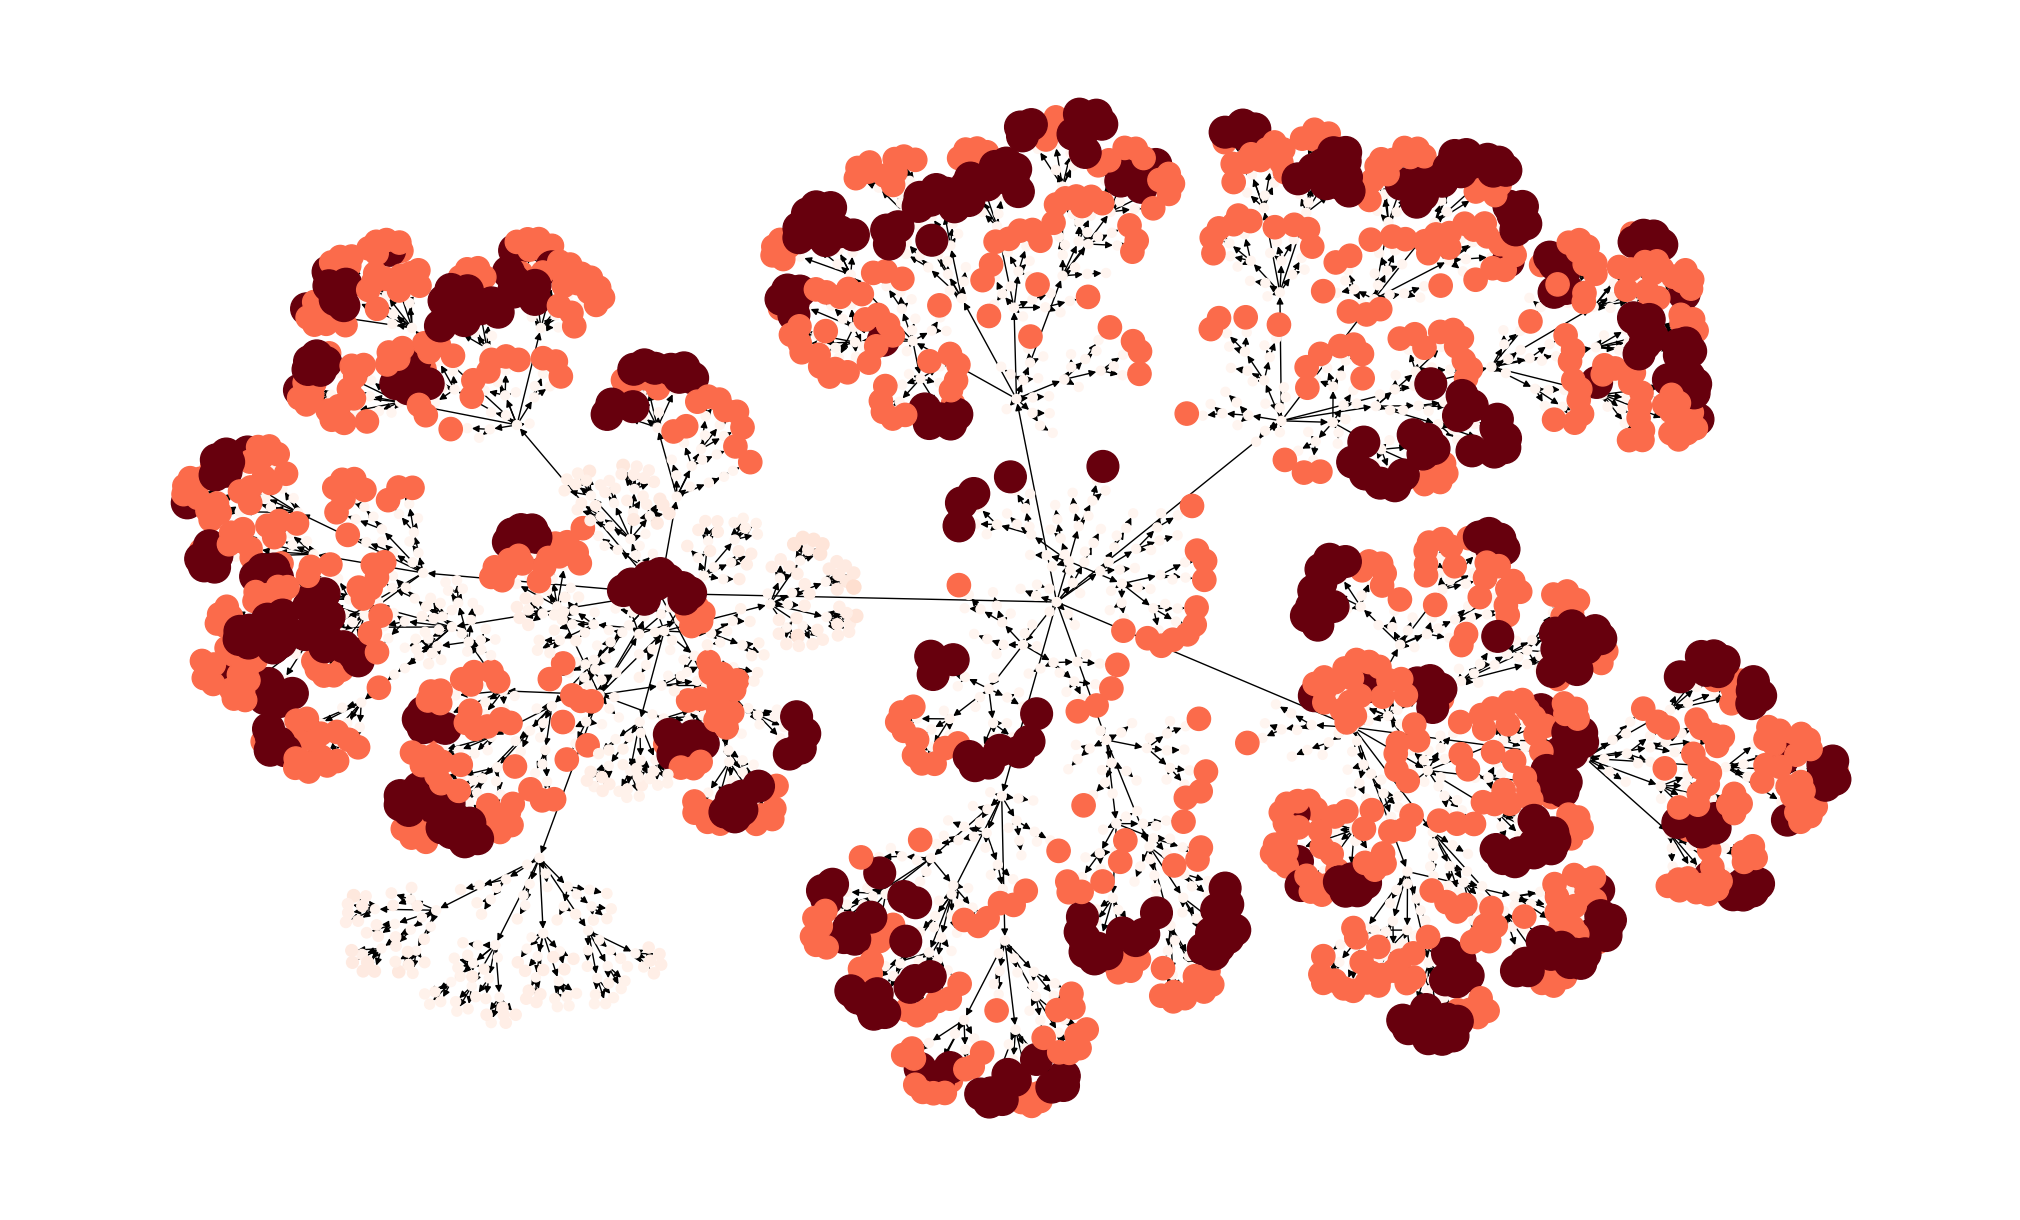

In [15]:
NUM_BLOCKS = 14
NUM_BLOCKS_SOLUTION = NUM_BLOCKS // 2

random.seed(17)
BLOCKS = [random.randint(1, 100) for _ in range(NUM_BLOCKS)]
GOAL = sum(random.sample(BLOCKS, NUM_BLOCKS_SOLUTION))
print(f"{BLOCKS} -> {GOAL}")

search_tree = tree_search_bf(BLOCKS, GOAL)

plt.figure(figsize=(20, 12))
pos = graphviz_layout(search_tree, prog="sfdp")  # dot neato twopi circo fdp sfdp
nx.draw(
    search_tree,
    pos=pos,
    node_color=[c for _, c in search_tree.nodes(data="count")],
    node_size=[40 + 2 * c for _, c in search_tree.nodes(data="count")],
    cmap=plt.cm.Reds,
    with_labels=False,
)

## Depth-first + Bound

In [25]:
def tree_search_df(blocks, goal, bound=False):
    search_tree = nx.DiGraph()
    frontier = deque()

    frontier.append(((), tuple(blocks)))

    n = 0
    while frontier:
        n += 1
        current_bag, available_blocks = frontier.pop()
        search_tree.add_node(current_bag)
        search_tree.nodes[current_bag]["color"] = "yellow"
        search_tree.nodes[current_bag]["order"] = n
        search_tree.nodes[current_bag]["count"] = 1

        if sum(current_bag) == goal:
            print(f"Found a solution in {n:,} steps\n\t{current_bag}")
            search_tree.nodes[current_bag]["color"] = "lime"
            break
        if bound and sum(current_bag) > goal:
            search_tree.nodes[current_bag]["color"] = "red"
            continue
        search_tree.nodes[current_bag]["color"] = "royalblue"
        for i, object in enumerate(available_blocks):
            new_state = (
                tuple(sorted((*current_bag, object))),
                tuple(available_blocks[:i] + available_blocks[i + 1 :]),
            )
            if new_state[0] not in search_tree:
                search_tree.add_node(new_state[0], color="lavender", count=0)
                search_tree.add_edge(current_bag, new_state[0], label=object)
            search_tree.nodes[new_state[0]]["count"] += 1
            frontier.append(new_state)

    search_tree.nodes[()]["color"] = "navy"
    return search_tree

In [26]:
NUM_BLOCKS = 10
NUM_BLOCKS_SOLUTION = NUM_BLOCKS // 2

random.seed(17)
BLOCKS = [random.randint(1, 100) for _ in range(NUM_BLOCKS)]
GOAL = sum(random.sample(BLOCKS, NUM_BLOCKS_SOLUTION))
print(f"{BLOCKS} -> {GOAL}")

[67, 54, 39, 47, 38, 23, 99, 91, 91, 70] -> 297


Found a solution in 252,152 steps
	(23, 38, 67, 70, 99)


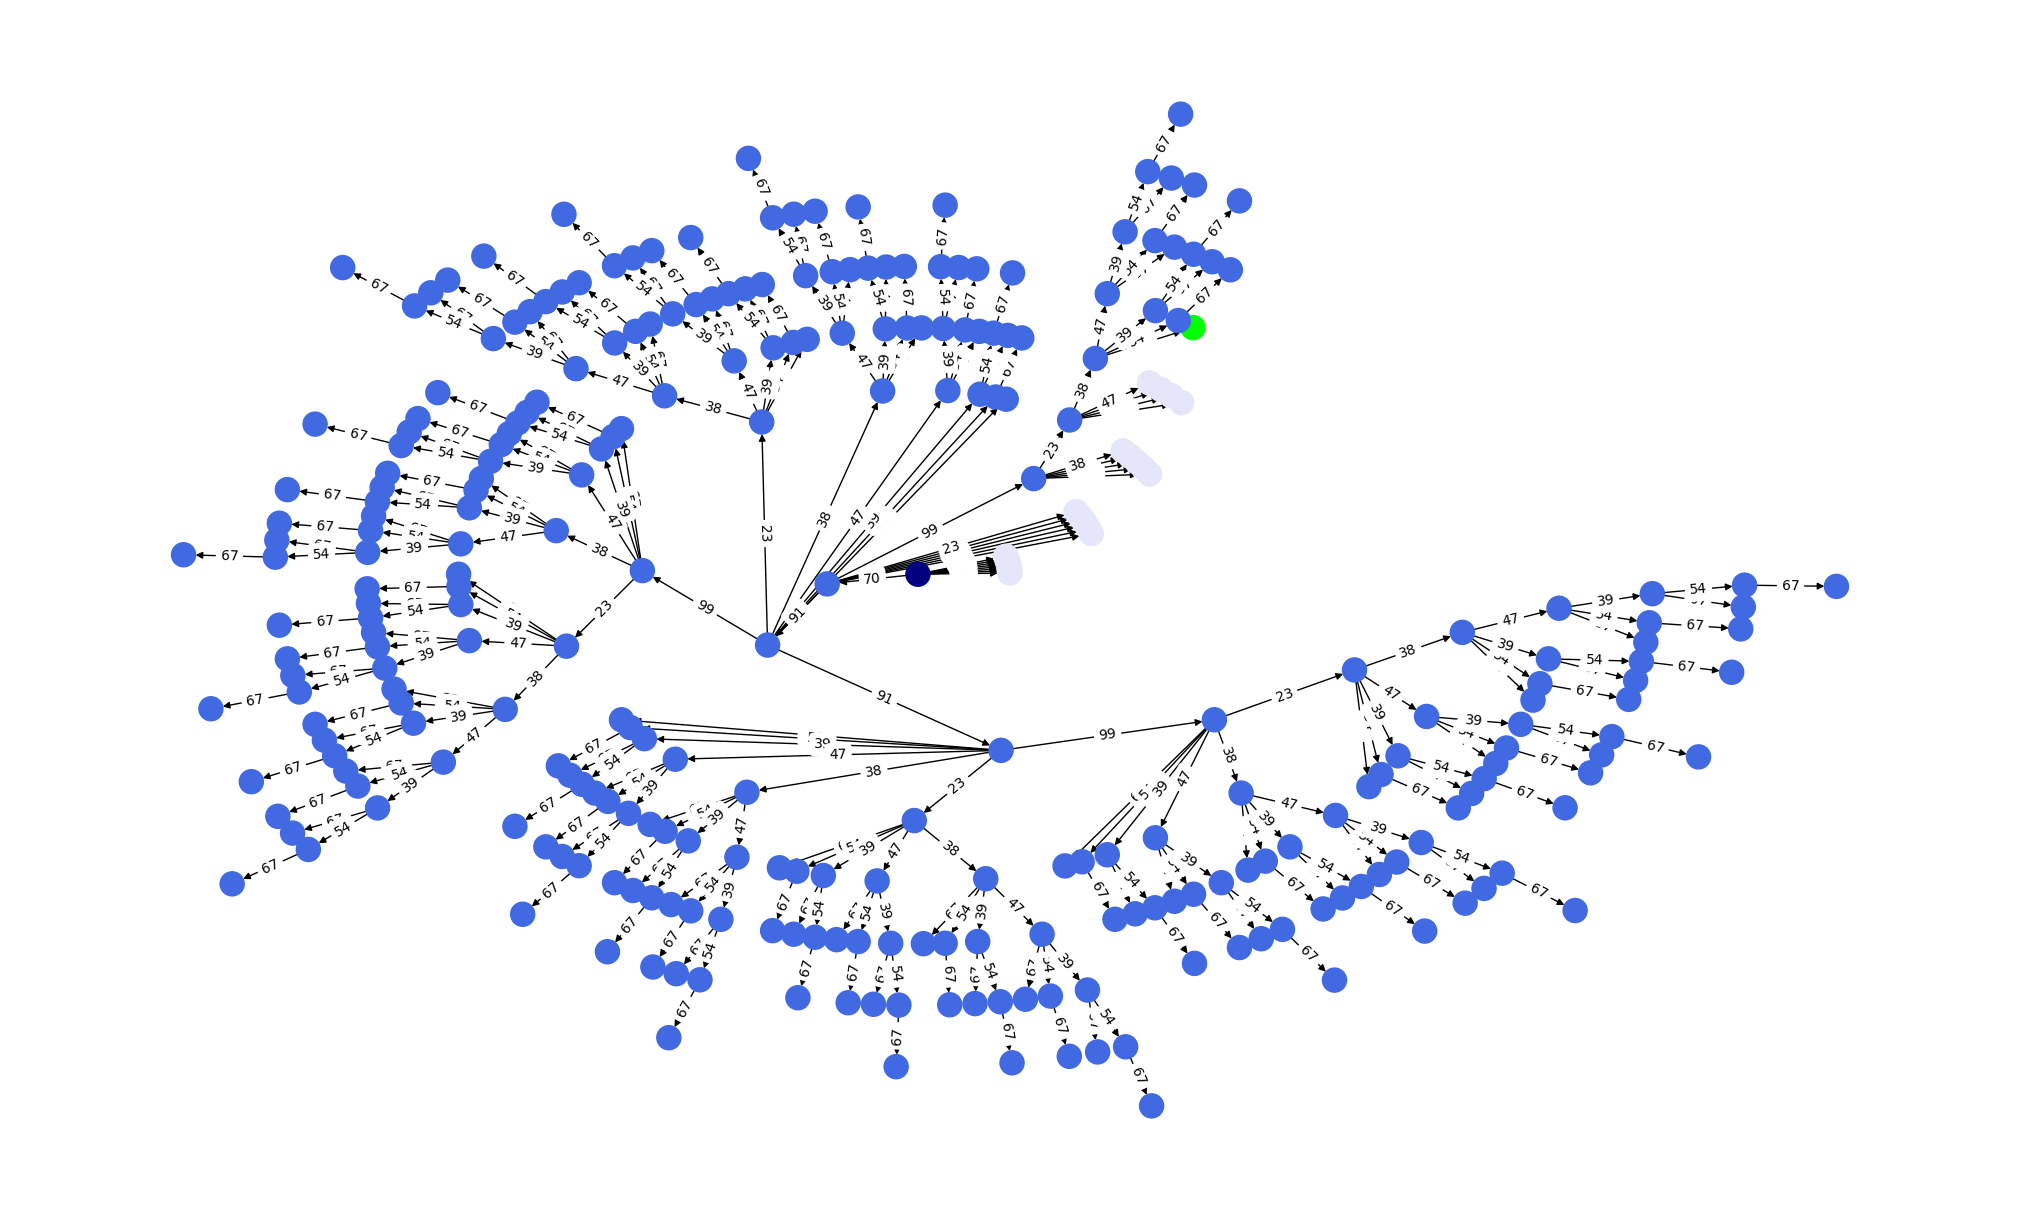

In [27]:
search_tree = tree_search_df(BLOCKS, GOAL, bound=False)

plt.figure(figsize=(20, 12))
pos = graphviz_layout(search_tree, prog="twopi")  # dot neato twopi circo fdp sfdp
nx.draw(
    search_tree,
    pos=pos,
    node_color=[c for _, c in search_tree.nodes(data="color")],
    # node_size=[90+100*c for _, c in search_tree.nodes(data='count')],
    with_labels=False,
)
nx.draw_networkx_edge_labels(search_tree, pos=pos, edge_labels=nx.get_edge_attributes(search_tree, "label"))
None

Found a solution in 1,254 steps
	(23, 38, 67, 70, 99)


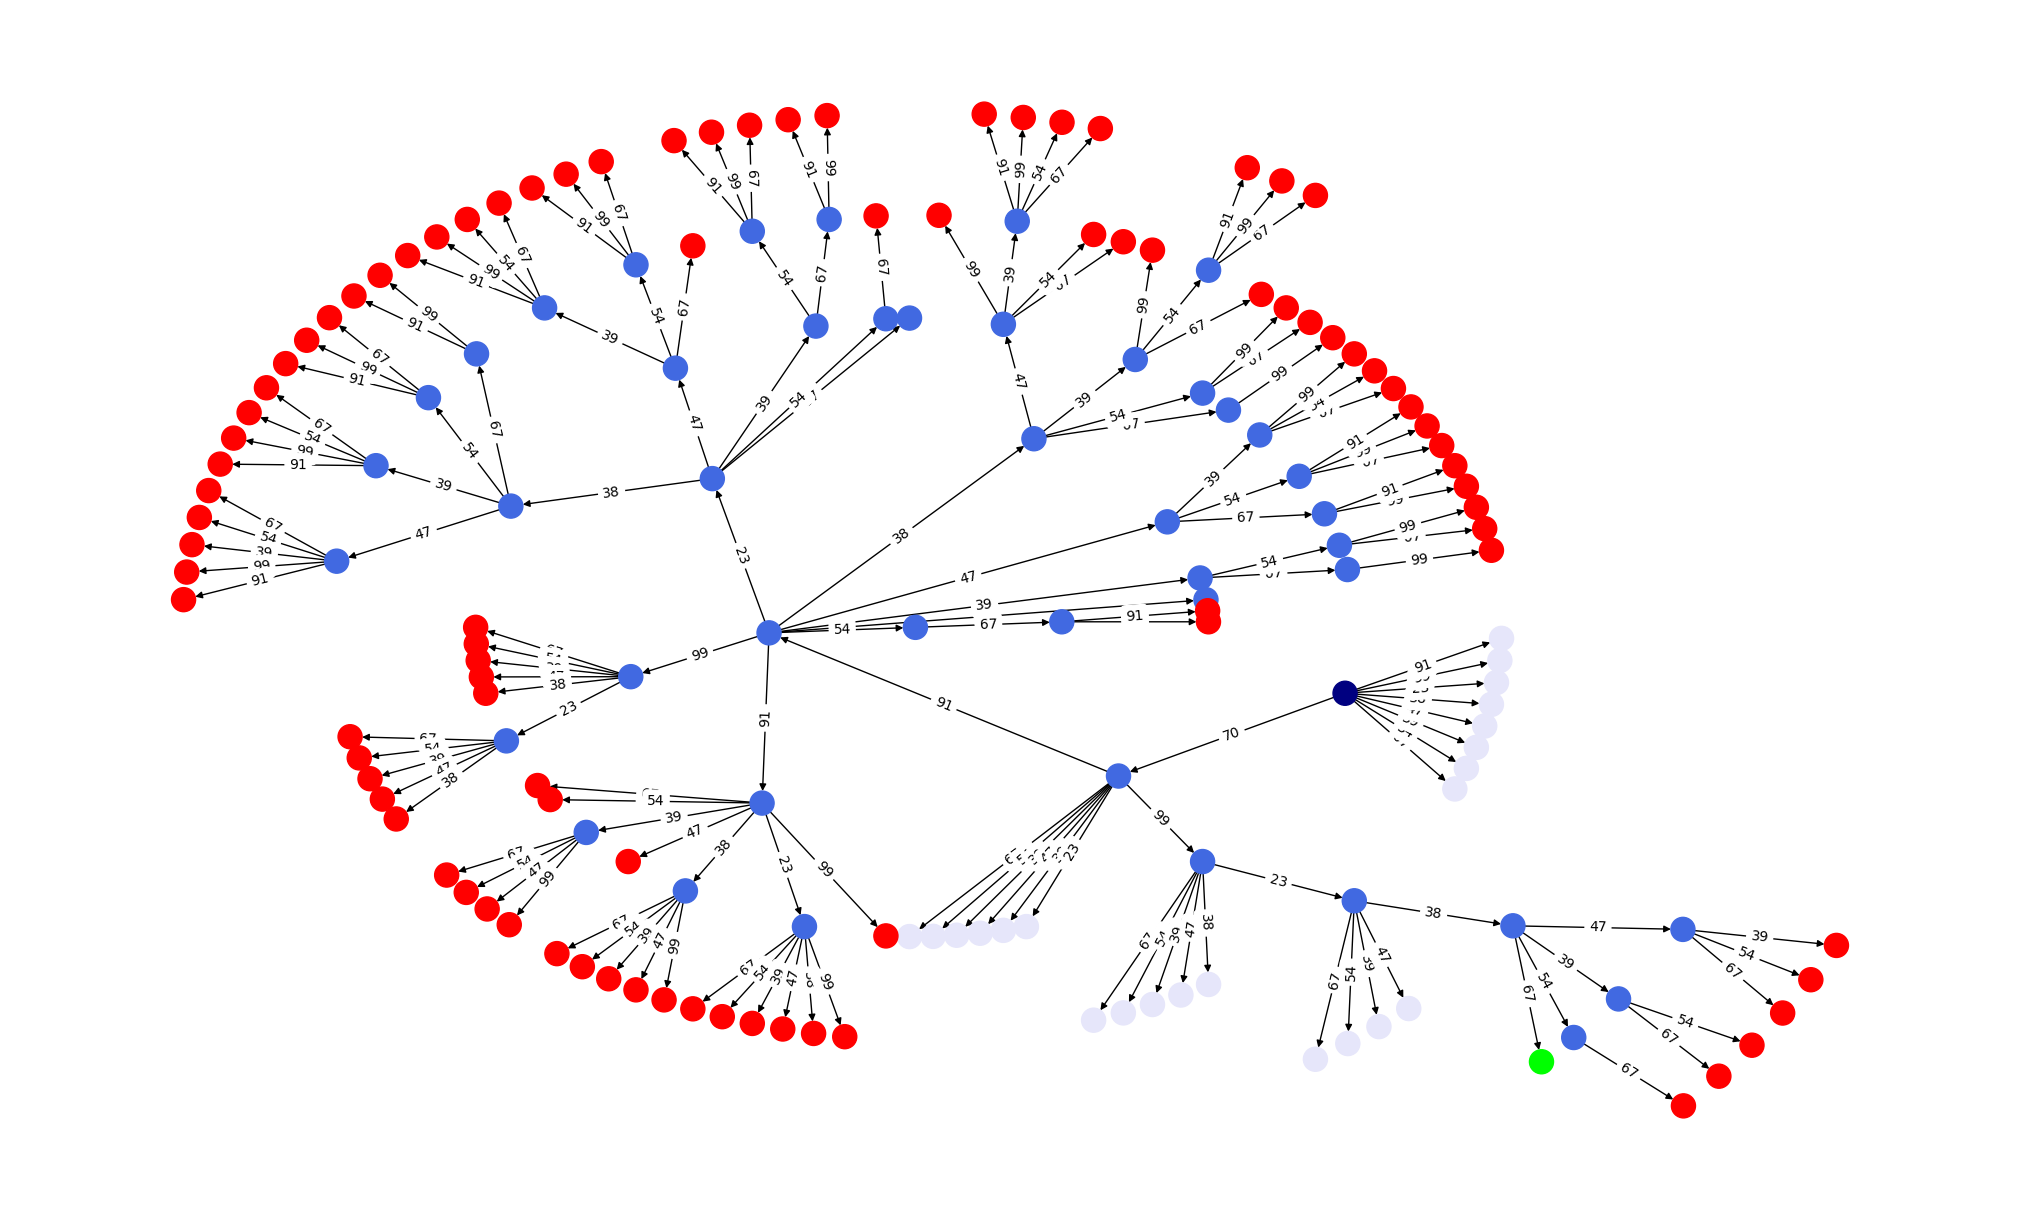

In [28]:
search_tree = tree_search_df(BLOCKS, GOAL, bound=True)

plt.figure(figsize=(20, 12))
pos = graphviz_layout(search_tree, prog="twopi")  # dot neato twopi circo fdp sfdp
nx.draw(
    search_tree,
    pos=pos,
    node_color=[c for _, c in search_tree.nodes(data="color")],
    # node_size=[90+100*c for _, c in search_tree.nodes(data='count')],
    with_labels=False,
)
nx.draw_networkx_edge_labels(search_tree, pos=pos, edge_labels=nx.get_edge_attributes(search_tree, "label"))
None